In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('sciml-style')

## Commands used

These are the commands used to run the active leanring processes for entropy based and random sampling.

Entropy based
```
python gp-net.py -data formation_energy_per_atom_data.pkl -ndims 1 -q 3000 -frac 0.4 -epochs 0 -prev -cycle 1 3000 -maxiters 100 -stop 0.99 -include
```
Random
```
python gp-net-skip-activation.py -data formation_energy_per_atom_data.pkl -ndims 1 -q 3000 -frac 0.4 -epochs 0 -prev -cycle 1 3000 -maxiters 0 -stop 0.99 -include -samp random -amp 0.4281 -length 2.3997
```

In [2]:
entropy_result = np.load('data-sets/gp_mae_entropy.npy')
random_result = np.load('data-sets/gp_mae_random.npy')

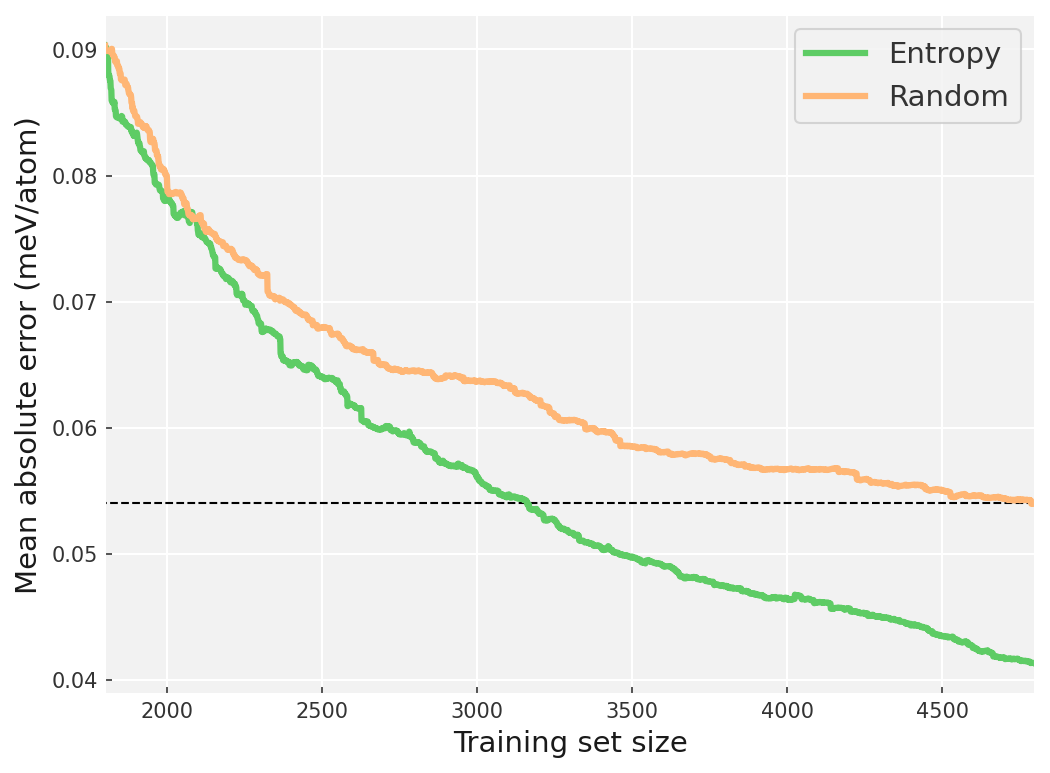

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.arange(1800, len(entropy_result)+1800), entropy_result, label='Entropy', lw=3)
ax.plot(np.arange(1800, len(random_result)+1800), random_result, label='Random', lw=3)
ax.hlines(random_result[-1], 0, 4800, ls='--', lw=1)
ax.set_xlabel('Training set size', size=14)
ax.set_ylabel('Mean absolute error (meV/atom)', size=14)
ax.set_xlim(1800, 4800)
ax.legend(fontsize=14)
plt.savefig('active-learning.png')

In [4]:
print('Entropy learning after 3000 cycles: {:.4f}'.format(entropy_result[-1]))
print('Random learning after 3000 cycles: {:.4f}'.format(random_result[-1]))
print('Percentage improvement {:.2f}%'.format((random_result[-1] - entropy_result[-1])/np.mean([entropy_result[-1],
                                                                random_result[-1]])*100))
print('{:.4f} > {:.4f} > {:.4f}'.format(entropy_result[1361], random_result[-1], entropy_result[1362]))
print('Reached same as random 3000, in 1361 steps. {:.2f} fold improvement'.format((3600-1361)/1361))

Entropy learning after 3000 cycles: 0.0413
Random learning after 3000 cycles: 0.0540
Percentage improvement 26.68%
0.0541 > 0.0540 > 0.0539
Reached same as random 3000, in 1361 steps. 1.65 fold improvement
